In [1]:
import pandas as pd

# Load the dataset
file_path = 'horse_details.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head(), df.info(), df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743582 entries, 0 to 743581
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   At İsmi      743582 non-null  object 
 1   Irk          743582 non-null  object 
 2   Cinsiyet     743582 non-null  object 
 3   Yaş          743582 non-null  object 
 4   Doğ. Trh     743491 non-null  object 
 5   Handikap P.  712298 non-null  float64
 6   Tarih        717838 non-null  object 
 7   Şehir        717838 non-null  object 
 8   Mesafe       717838 non-null  float64
 9   Pist         717838 non-null  object 
 10  Derece       717712 non-null  object 
 11  Siklet       717838 non-null  object 
 12  Takı         630172 non-null  object 
 13  Jokey        717835 non-null  object 
 14  details      743582 non-null  object 
dtypes: float64(2), object(13)
memory usage: 85.1+ MB


(                      At İsmi      Irk Cinsiyet       Yaş    Doğ. Trh  \
 0            A BEAUTIFUL MIND  İngiliz     Dişi   6 y  dk  16.03.2018   
 1  A BEAUTIFUL MIND 2023 Tayı  İngiliz     Dişi   1 y  dd  14.03.2023   
 2  A BEAUTIFUL MIND 2024 Tayı  İngiliz    Erkek   0 y  de  12.03.2024   
 3                   A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020   
 4                   A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020   
 
    Handikap P.       Tarih     Şehir  Mesafe         Pist   Derece Siklet  \
 0          NaN         NaN       NaN     NaN          NaN      NaN    NaN   
 1          NaN         NaN       NaN     NaN          NaN      NaN    NaN   
 2          NaN         NaN       NaN     NaN          NaN      NaN    NaN   
 3         20.0  09.08.2023  İstanbul  1400.0  Ç:Normal3.3  1.27.52     58   
 4         20.0  09.07.2023  İstanbul  1500.0     S:Normal  1.33.64     50   
 
    Takı     Jokey                                            details  
 0   NaN    

In [2]:
# Remove rows where "Derece" is missing or "Drcsz"
df_cleaned = df[~df['Derece'].isin(['Drcsz', None, 'NONE'])]

# Remove rows with missing "Şehir" or "Mesafe"
df_cleaned = df_cleaned.dropna(subset=['Şehir', 'Mesafe'])

# Convert "Derece" to milliseconds
def convert_to_milliseconds(derece):
    if isinstance(derece, str):
        try:
            minutes, seconds, milliseconds = map(int, derece.split('.'))
            return (minutes * 60 * 1000) + (seconds * 1000) + milliseconds
        except ValueError:
            return None
    return None

df_cleaned['Derece_ms'] = df_cleaned['Derece'].apply(convert_to_milliseconds)

# Drop rows where conversion failed (if any)
df_cleaned = df_cleaned.dropna(subset=['Derece_ms'])

# Display the first few rows of the cleaned dataset
df_cleaned.head(), df_cleaned.info(), df_cleaned.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 705640 entries, 3 to 743579
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   At İsmi      705640 non-null  object 
 1   Irk          705640 non-null  object 
 2   Cinsiyet     705640 non-null  object 
 3   Yaş          705640 non-null  object 
 4   Doğ. Trh     705640 non-null  object 
 5   Handikap P.  699818 non-null  float64
 6   Tarih        705640 non-null  object 
 7   Şehir        705640 non-null  object 
 8   Mesafe       705640 non-null  float64
 9   Pist         705640 non-null  object 
 10  Derece       705640 non-null  object 
 11  Siklet       705640 non-null  object 
 12  Takı         619546 non-null  object 
 13  Jokey        705639 non-null  object 
 14  details      705640 non-null  object 
 15  Derece_ms    705640 non-null  float64
dtypes: float64(3), object(13)
memory usage: 91.5+ MB


(          At İsmi      Irk Cinsiyet       Yaş    Doğ. Trh  Handikap P.  \
 3       A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020         20.0   
 4       A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020         20.0   
 5       A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020         20.0   
 6       A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020         20.0   
 8  A DROP OF LOVE  İngiliz     Dişi  21 y  dk  14.05.2003         50.0   
 
         Tarih     Şehir  Mesafe                Pist   Derece Siklet  Takı  \
 3  09.08.2023  İstanbul  1400.0         Ç:Normal3.3  1.27.52     58  DBSK   
 4  09.07.2023  İstanbul  1500.0            S:Normal  1.33.64     50    SK   
 5  24.06.2023  İstanbul  1600.0         Ç:Normal3.3  1.41.76     58     K   
 6  04.06.2023  İstanbul  1400.0    Ç:Çok Yumuşak3.9  1.31.05     58     K   
 8  01.12.2008     Adana  1300.0  Ç:Biraz Yumuşak3.4  1.23.09     55     K   
 
       Jokey                                            details  Derece_ms  
 

In [3]:
import re

# Function to parse the "Yaş" column into numeric age and classification
def parse_yas(yas):
    # Extract numeric age (the part before 'y')
    age_match = re.search(r'(\d+)\sy', yas)
    age = int(age_match.group(1)) if age_match else None
    
    # Extract the classification symbols after 'y'
    classification_match = re.search(r'y\s*([a-zA-Z]{2})', yas.replace(" ", ""))
    classification = classification_match.group(1) if classification_match else None
    
    return age, classification

# Function to parse the "Pist" column into pist type and condition
def parse_pist(pist):
    # Extract the first character (pist type)
    pist_type = pist[0]
    
    # Extract the track condition, if present
    pist_condition_match = re.search(r':([a-zA-Z\s]+)', pist)
    pist_condition = pist_condition_match.group(1).strip() if pist_condition_match else None
    
    return pist_type, pist_condition

# Apply the function to create two new columns
df_cleaned['Pist Type'], df_cleaned['Pist Condition'] = zip(*df_cleaned['Pist'].apply(parse_pist))

# Apply the function to create two new columns
df_cleaned['Age'], df_cleaned['Condition'] = zip(*df_cleaned['Yaş'].apply(parse_yas))

# Drop the original "Yaş" and "Pist" columns
df_cleaned = df_cleaned.drop(columns=['Yaş', 'Pist'])

# Display the first few rows of the cleaned and engineered dataset
print(df_cleaned.head())
print(df_cleaned[['Age', 'Condition', 'Pist Type', 'Pist Condition']].describe(include='all'))

          At İsmi      Irk Cinsiyet    Doğ. Trh  Handikap P.       Tarih  \
3       A BİENTOT  İngiliz    Erkek  06.04.2020         20.0  09.08.2023   
4       A BİENTOT  İngiliz    Erkek  06.04.2020         20.0  09.07.2023   
5       A BİENTOT  İngiliz    Erkek  06.04.2020         20.0  24.06.2023   
6       A BİENTOT  İngiliz    Erkek  06.04.2020         20.0  04.06.2023   
8  A DROP OF LOVE  İngiliz     Dişi  14.05.2003         50.0  01.12.2008   

      Şehir  Mesafe   Derece Siklet  Takı     Jokey  \
3  İstanbul  1400.0  1.27.52     58  DBSK  O.ÖZTÜRK   
4  İstanbul  1500.0  1.33.64     50    SK   E.AVŞAR   
5  İstanbul  1600.0  1.41.76     58     K  O.ÖZTÜRK   
6  İstanbul  1400.0  1.31.05     58     K  M.HAMEDİ   
8     Adana  1300.0  1.23.09     55     K   M.BAYIR   

                                             details  Derece_ms Pist Type  \
3  https://www.tjk.org/TR/YarisSever/Query/Connec...    87052.0         Ç   
4  https://www.tjk.org/TR/YarisSever/Query/Connec...    93

In [19]:
df_cleaned[['Pist Type', 'Pist Condition', 'Siklet', 'Handikap P.']].describe(include='all')

,Pist Type,Pist Condition,Siklet,Handikap P.
count,705640,583023,705640,699818.000000
unique,3,8,52,NaN
top,K,Normal,58,NaN
freq,403587,494889,83513,NaN
mean,NaN,NaN,NaN,44.420179
std,NaN,NaN,NaN,26.257150
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,26.000000
50%,NaN,NaN,NaN,40.000000
75%,NaN,NaN,NaN,61.000000


In [4]:
# drop age column because it is not useful
df_cleaned = df_cleaned.drop(columns=['Age'])

# calculate the age of the horse at the time of the race
df_cleaned['Doğum Tarihi'] = pd.to_datetime(df_cleaned['Doğ. Trh'], dayfirst=True)
df_cleaned['Yarış Tarihi'] = pd.to_datetime(df_cleaned['Tarih'], dayfirst=True)
df_cleaned['Age'] = df_cleaned['Yarış Tarihi'].dt.year - df_cleaned['Doğum Tarihi'].dt.year

# drop the original columns
df_cleaned = df_cleaned.drop(columns=['Doğ. Trh', 'Tarih', 'Doğum Tarihi', 'Yarış Tarihi'])

# Display the first few rows of the cleaned and engineered dataset
print(df_cleaned.head())

          At İsmi      Irk Cinsiyet  Handikap P.     Şehir  Mesafe   Derece  \
3       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1400.0  1.27.52   
4       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1500.0  1.33.64   
5       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1600.0  1.41.76   
6       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1400.0  1.31.05   
8  A DROP OF LOVE  İngiliz     Dişi         50.0     Adana  1300.0  1.23.09   

  Siklet  Takı     Jokey                                            details  \
3     58  DBSK  O.ÖZTÜRK  https://www.tjk.org/TR/YarisSever/Query/Connec...   
4     50    SK   E.AVŞAR  https://www.tjk.org/TR/YarisSever/Query/Connec...   
5     58     K  O.ÖZTÜRK  https://www.tjk.org/TR/YarisSever/Query/Connec...   
6     58     K  M.HAMEDİ  https://www.tjk.org/TR/YarisSever/Query/Connec...   
8     55     K   M.BAYIR  https://www.tjk.org/TR/YarisSever/Query/Connec...   

   Derece_ms Pist Type Pist Condition Condition  A

In [5]:
df_cleaned[["Jokey"]].describe(include='all')

,Jokey
count,705639
unique,1270
top,M.KAYA
freq,12020


In [6]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, feature):
    Q1 = np.percentile(df[feature], 15)
    Q3 = np.percentile(df[feature], 85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Detect outliers in "Mesafe" and "Derece_ms" and "Age"
outliers_mesafe = detect_outliers_iqr(df_cleaned, 'Mesafe')
outliers_derece = detect_outliers_iqr(df_cleaned, 'Derece_ms')
outliers_age = detect_outliers_iqr(df_cleaned, 'Age')

# Display the number of outliers detected
print(f"Outliers detected in 'Mesafe': {len(outliers_mesafe)}")
print(f"Outliers detected in 'Derece_ms': {len(outliers_derece)}")
print(f"Outliers detected in 'Age': {len(outliers_age)}")

# Combine the outlier indices
outliers = pd.concat([outliers_mesafe, outliers_derece, outliers_age])

# Exclude outliers from the dataset
df_no_outliers = df_cleaned.drop(outliers.index)

# Display the shape of the dataset after excluding outliers
print(f"Dataset shape after outlier exclusion: {df_no_outliers.shape}")

Outliers detected in 'Mesafe': 4
Outliers detected in 'Derece_ms': 62
Outliers detected in 'Age': 8029
Dataset shape after outlier exclusion: (697552, 16)


In [7]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Step 1: Convert "Cinsiyet" and "Irk" to single binary columns
df_no_outliers['Cinsiyet_binary'] = df_no_outliers['Cinsiyet'].apply(lambda x: 1 if x == 'Erkek' else 0)
df_no_outliers['Irk_binary'] = df_no_outliers['Irk'].apply(lambda x: 1 if x == 'İngiliz' else 0)

# Step 2: One-Hot Encode the "Condition" and "Şehir" columns
df_encoded = pd.get_dummies(df_no_outliers, columns=['Condition' , 'Şehir'])

# Step 3: Normalize numerical features
mesafe_scaler = MinMaxScaler()
age_scaler = MinMaxScaler()
derece_ms_scaler = MinMaxScaler()

# Fit the scalers to your data (during training)
df_encoded['Mesafe_normalized'] = mesafe_scaler.fit_transform(df_encoded[['Mesafe']])
df_encoded['Age_normalized'] = age_scaler.fit_transform(df_encoded[['Age']])
df_encoded['Derece_ms_normalized'] = derece_ms_scaler.fit_transform(df_encoded[['Derece_ms']])

# Save the scalers for later use
joblib.dump(mesafe_scaler, 'mesafe_scaler.pkl')
joblib.dump(age_scaler, 'age_scaler.pkl')
joblib.dump(derece_ms_scaler, 'derece_ms_scaler.pkl')

# Display the first few rows of the final prepared dataset
print(df_encoded.head())

          At İsmi      Irk Cinsiyet  Handikap P.  Mesafe   Derece Siklet  \
3       A BİENTOT  İngiliz    Erkek         20.0  1400.0  1.27.52     58   
4       A BİENTOT  İngiliz    Erkek         20.0  1500.0  1.33.64     50   
5       A BİENTOT  İngiliz    Erkek         20.0  1600.0  1.41.76     58   
6       A BİENTOT  İngiliz    Erkek         20.0  1400.0  1.31.05     58   
8  A DROP OF LOVE  İngiliz     Dişi         50.0  1300.0  1.23.09     55   

   Takı     Jokey                                            details  ...  \
3  DBSK  O.ÖZTÜRK  https://www.tjk.org/TR/YarisSever/Query/Connec...  ...   
4    SK   E.AVŞAR  https://www.tjk.org/TR/YarisSever/Query/Connec...  ...   
5     K  O.ÖZTÜRK  https://www.tjk.org/TR/YarisSever/Query/Connec...  ...   
6     K  M.HAMEDİ  https://www.tjk.org/TR/YarisSever/Query/Connec...  ...   
8     K   M.BAYIR  https://www.tjk.org/TR/YarisSever/Query/Connec...  ...   

   Şehir_Kempton Park Birleşik Krallık Şehir_Kocaeli Şehir_Meydan Dubai  \
3    

In [8]:
import pandas as pd

# Calculate the mean of the target variable for each Jokey
mean_encoded_jokey = df_encoded.groupby('Jokey')['Derece_ms_normalized'].mean()

# Map the mean encoding to the Jokey feature in the training set
df_encoded['Jokey_encoded'] = df_encoded['Jokey'].map(mean_encoded_jokey)

In [9]:
from sklearn.model_selection import KFold

def target_encode_jokey(df, target, column_name, n_splits=5):
    """
    Apply target encoding to the 'Jokey' column.
    
    Parameters:
    - df: DataFrame containing the data.
    - target: The target column, 'Derece_ms'.
    - column_name: The column to encode, 'Jokey'.
    - n_splits: Number of folds for cross-validation.
    
    Returns:
    - DataFrame with the target-encoded 'Jokey' feature.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    encoded_column = np.zeros(df.shape[0])
    global_mean = df[target].mean()

    for train_index, val_index in kf.split(df):
        train_fold = df.iloc[train_index]
        val_fold = df.iloc[val_index]
        
        # Calculate the mean target for each Jokey in the training fold
        fold_mean = train_fold.groupby(column_name)[target].mean()
        
        # Apply smoothing
        count = train_fold.groupby(column_name).size()
        smooth = 1 / (1 + np.exp(-(count - 1)))
        val_fold_encoded = val_fold[column_name].map(fold_mean * smooth + global_mean * (1 - smooth))
        
        # Fill missing values with the global mean
        val_fold_encoded.fillna(global_mean, inplace=True)
        
        encoded_column[val_index] = val_fold_encoded
    
    df[f'{column_name}_encoded'] = encoded_column
    return df

# Apply target encoding to the 'Jokey' feature
df_encoded = target_encode_jokey(df_encoded, target='Derece_ms_normalized', column_name='Jokey')

In [10]:
from sklearn.model_selection import train_test_split

# Proceed with training the model using the new encoded feature
X = df_encoded
y = df_encoded['Derece_ms_normalized']

# Split the data, train, and evaluate the model as before
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Save training and test csv files
X_train.to_csv('train.csv', index=False)
X_val.to_csv('validation.csv', index=False)
X_test.to_csv('test.csv', index=False)

In [11]:
X_train.describe(), X_val.describe(), X_test.describe()

(         Handikap P.         Mesafe      Derece_ms            Age  \
 count  553419.000000  558041.000000  558041.000000  558041.000000   
 mean       44.155331    1547.416790  106134.880512       3.873848   
 std        26.158521     324.878756   24632.909470       1.342799   
 min         0.000000     800.000000   47017.000000       2.000000   
 25%        26.000000    1300.000000   86098.000000       3.000000   
 50%        39.000000    1400.000000   99098.000000       4.000000   
 75%        60.000000    1900.000000  126031.000000       4.000000   
 max       140.000000    3200.000000  220039.000000       8.000000   
 
        Cinsiyet_binary     Irk_binary  Mesafe_normalized  Age_normalized  \
 count    558041.000000  558041.000000      558041.000000   558041.000000   
 mean          0.551721       0.519354           0.311424        0.312308   
 std           0.497318       0.499626           0.135366        0.223800   
 min           0.000000       0.000000           0.000000   

In [12]:
# Define the columns to keep
columns_to_keep = ['Age_normalized', 'Cinsiyet_binary', 'Irk_binary'] + [col for col in X_train.columns if 'Şehir_' in col]
columns_to_keep += ['Mesafe_normalized', 'Jokey_encoded'] + [col for col in X_train.columns if 'Condition_' in col]

# Select only the columns to keep from the datasets
X_train = X_train[columns_to_keep]
X_val = X_val[columns_to_keep]
X_test = X_test[columns_to_keep]

In [13]:
X_train.head()

,Age_normalized,Cinsiyet_binary,Irk_binary,Şehir_ABD,Şehir_Abu Dhabi Birleşik Arap Emirlikleri,Şehir_Adana,Şehir_Ankara,Şehir_Antalya,Şehir_Bursa,Şehir_Churchill Downs ABD,...,Condition_de,Condition_dg,Condition_dk,Condition_ka,Condition_kd,Condition_ke,Condition_kg,Condition_kk,Condition_ya,Condition_yk
283700,0.500000,1,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
499807,0.000000,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
164560,0.333333,0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66647,0.333333,0,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
330008,0.166667,1,0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [15]:
# open the best hyperparameters json file as read mode
import json
import xgboost as xgb
from sklearn.metrics import mean_squared_error

with open('best_hyperparameters.json', 'r') as file:
    best_hyperparameters = json.load(file)

model = xgb.XGBRegressor(
    n_estimators=int(best_hyperparameters['n_estimators']),
    max_depth=int(best_hyperparameters['max_depth']),
    gamma=best_hyperparameters['gamma'],
    reg_alpha=int(best_hyperparameters['reg_alpha']),
    reg_lambda=best_hyperparameters['reg_lambda'],
    min_child_weight=int(best_hyperparameters['min_child_weight']),
    colsample_bytree=best_hyperparameters['colsample_bytree'],
    subsample=best_hyperparameters['subsample'],
    learning_rate=best_hyperparameters['learning_rate']
)

model.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])

final_preds = model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_preds)

print(f"Final RMSE of MODEL on the test set: {final_rmse}")


[0]	validation_0-rmse:0.13793
[1]	validation_0-rmse:0.13404
[2]	validation_0-rmse:0.13029
[3]	validation_0-rmse:0.12666
[4]	validation_0-rmse:0.12315
[5]	validation_0-rmse:0.11976
[6]	validation_0-rmse:0.11648
[7]	validation_0-rmse:0.11332
[8]	validation_0-rmse:0.11026
[9]	validation_0-rmse:0.10730
[10]	validation_0-rmse:0.10444
[11]	validation_0-rmse:0.10167
[12]	validation_0-rmse:0.09900
[13]	validation_0-rmse:0.09642
[14]	validation_0-rmse:0.09391
[15]	validation_0-rmse:0.09150
[16]	validation_0-rmse:0.08918
[17]	validation_0-rmse:0.08692
[18]	validation_0-rmse:0.08474
[19]	validation_0-rmse:0.08266
[20]	validation_0-rmse:0.08062
[21]	validation_0-rmse:0.08012
[22]	validation_0-rmse:0.07819
[23]	validation_0-rmse:0.07638
[24]	validation_0-rmse:0.07593
[25]	validation_0-rmse:0.07415
[26]	validation_0-rmse:0.07242
[27]	validation_0-rmse:0.07075
[28]	validation_0-rmse:0.06916
[29]	validation_0-rmse:0.06879
[30]	validation_0-rmse:0.06725
[31]	validation_0-rmse:0.06579
[32]	validation_0-

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

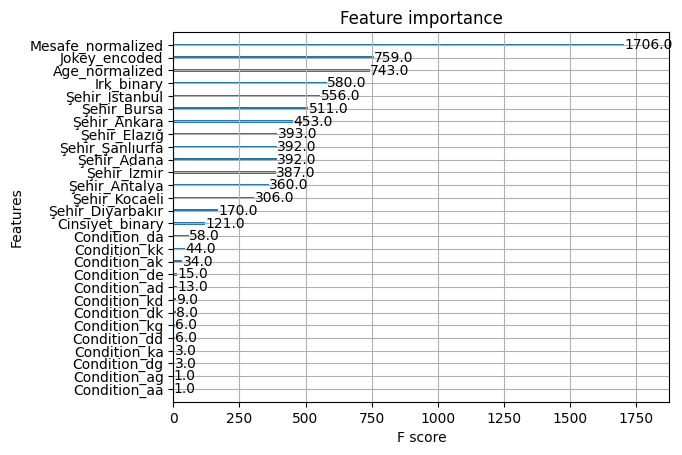

In [17]:
xgb.plot_importance(model, importance_type='weight')

In [14]:
# Import the necessary library for DMatrix
import xgboost as xgb

# turn ms into minutes:seconds:milliseconds
def convert_to_time(derece):
    minutes = int(derece / (60 * 1000))
    seconds = int((derece % (60 * 1000)) / 1000)
    milliseconds = int(derece % 1000)
    return f'{minutes}:{seconds:02d}.{milliseconds:03d}'

# Let's take a random sample from the test set
sample_index = 6
sample_data = X_test.iloc[sample_index:sample_index+1]

# Convert the sample data to DMatrix format
dmat_sample_data = xgb.DMatrix(sample_data)

# Make a prediction
predicted_derece_ms = model.predict(dmat_sample_data)
print(f'Predicted Derece_ms: {predicted_derece_ms[0]}')

# Convert the normalized prediction back to the original scale
predicted_derece = derece_ms_scaler.inverse_transform([[predicted_derece_ms[0]]])[0][0]
print(f'Predicted Derece: {predicted_derece}')

# Convert the predicted time to the desired format
predicted_time = convert_to_time(predicted_derece)
print(f'Predicted Time: {predicted_time}')

NameError: name 'model' is not defined

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


space = {
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    'gamma': hp.uniform('gamma', 0, 10),
    'reg_alpha': hp.quniform('reg_alpha', 0, 100, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 10),
    'seed': 42
}

def objective(space):
    model = xgb.XGBRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        reg_lambda=space['reg_lambda'],
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree'],
        subsample=space['subsample'],
        learning_rate=space['learning_rate'],
        seed=space['seed']
    )

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)
    
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds)
    
    print(f"RMSE: {rmse}")
    
    return {'loss': rmse, 'status': STATUS_OK}


trials = Trials()

best_hyperparams = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

print("The best hyperparameters are: ", best_hyperparams)

In [ ]:
best_model = xgb.XGBRegressor(
    n_estimators=int(best_hyperparams['n_estimators']),
    max_depth=int(best_hyperparams['max_depth']),
    gamma=best_hyperparams['gamma'],
    reg_alpha=int(best_hyperparams['reg_alpha']),
    reg_lambda=best_hyperparams['reg_lambda'],
    min_child_weight=int(best_hyperparams['min_child_weight']),
    colsample_bytree=best_hyperparams['colsample_bytree'],
    subsample=best_hyperparams['subsample'],
    learning_rate=best_hyperparams['learning_rate']
)

best_model.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])
final_preds = best_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_preds)

print(f"Final RMSE on the test set: {final_rmse}")


In [ ]:
import joblib
joblib.dump(best_model, 'xgb_model_optimized.pkl')

In [ ]:
import joblib

best_model = joblib.load('xgb_model_optimized.pkl')
final_preds = best_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_preds)

print(f"Final RMSE on the test set: {final_rmse}")

In [ ]:
xgb.plot_importance(model, importance_type='weight')

In [ ]:
import xgboost as xgb

# Function to turn milliseconds into minutes:seconds:milliseconds
def convert_to_time(derece):
    minutes = int(derece / (60 * 1000))
    seconds = int((derece % (60 * 1000)) / 1000)
    milliseconds = int(derece % 1000)
    return f'{minutes}:{seconds:02d}.{milliseconds:03d}'

# Take a random sample from the test set
sample_index = 0
sample_data = X_test.iloc[sample_index:sample_index+1]

# Make a prediction without converting to DMatrix
predicted_derece_ms = best_model.predict(sample_data)
print(f'Predicted Derece_ms (SEPERATE normalized): {predicted_derece_ms[0]}')
predicted_derece_ms = model.predict(sample_data)
print(f'Predicted Derece_ms (ALL TOGETHER normalized): {predicted_derece_ms[0]}')

# # Convert the normalized prediction back to the original scale
# predicted_derece = derece_ms_scaler.inverse_transform([[predicted_derece_ms[0]]])[0][0]
# print(f'Predicted Derece (original scale): {predicted_derece}')

# # Convert the predicted time to the desired format
# predicted_time = convert_to_time(predicted_derece)
# print(f'Predicted Time: {predicted_time}')
